In [99]:
import pandas as pd
import matplotlib.pyplot as plt

train_df = pd.read_csv("test.csv", delimiter=";")

train_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [79]:
print(train_df.shape)

(4521, 17)


In [81]:


train_df = train_df.dropna()

In [33]:
df 

<class 'pandas.core.frame.DataFrame'>


In [83]:
train_df = train_df.rename(columns={'y':'target'})
train_df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [84]:
df = train_df.copy()

## Getting the exact values in the colums in a dataframe

In [85]:
binary_columns = [] #this is the list that contains all the values

for column in df.select_dtypes('object').columns: #this code calls or generates all the columns to be iterated on
    if len(df[column].unique()) == 2: #this syntax generates the len of the values in the columns to satisfy the condition
        binary_columns.append(column) # this syntax is to add or append all the various values into the empty list,i.e binary columns
    
    print(f"Column - {column} ",df[column].unique(), end='\n\n')

Column - job  ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']

Column - marital  ['married' 'single' 'divorced']

Column - education  ['primary' 'secondary' 'tertiary' 'unknown']

Column - default  ['no' 'yes']

Column - housing  ['no' 'yes']

Column - loan  ['no' 'yes']

Column - contact  ['cellular' 'unknown' 'telephone']

Column - month  ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']

Column - poutcome  ['unknown' 'failure' 'other' 'success']

Column - target  ['no' 'yes']



## convert strings to int

In [86]:

for column in binary_columns:
    df[column] = df[column].map({'yes': 1, 'no': 0}) #this syntax is used to map values
    
df.loc[:, binary_columns]

,default,housing,loan,target
0,0,0,0,0
1,0,1,1,0
2,0,1,0,0
3,0,1,1,0
4,0,1,0,0
...,...,...,...,...
4516,0,1,0,0
4517,1,1,1,0
4518,0,0,0,0
4519,0,0,0,0


## the relations between the columns and target

In [88]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


## Sum of total targets and their resp. ages

In [100]:
age = df.groupby('age').sum()

age

,default,balance,housing,loan,day,duration,campaign,pdays,previous,target
age,,,,,,,,,,
19,0,1574,0,0,43,895,24,-4,0,2
20,0,1984,0,0,53,707,7,369,5,1
21,0,12420,2,0,119,1646,17,387,11,1
22,0,13098,1,3,111,1680,12,214,13,3
23,1,42359,14,0,330,5090,61,327,1,2
...,...,...,...,...,...,...,...,...,...,...
81,0,1,0,0,19,65,5,-1,0,0
83,0,1522,0,0,76,1868,13,215,4,2
84,0,639,0,0,18,353,3,-1,0,1


In [101]:
target_per_age = age['target']

target_per_age

age
19    2
20    1
21    1
22    3
23    2
     ..
81    0
83    2
84    1
86    0
87    1
Name: target, Length: 67, dtype: int64

In [103]:
sum_target = [target for target, df in df.groupby('age')]

print(len(sum_target))

67


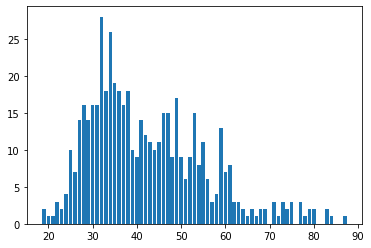

In [119]:
plt.bar(sum_target, target_per_age)

plt.show()

In [127]:
import numpy as np

temp = np.max(target_per_age)
temp2 = np.min(target_per_age)
print(f"Max target: {temp}, Min target: {temp2}")

Max target: 28, Min target: 0


In [128]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


In [129]:
job_df = df.groupby('job').sum()

job_df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,target
job,,,,,,,,,,,
admin.,18968,6,586380,302,91,7803,112172,1258,23897,308,58
blue-collar,37988,14,1026563,695,156,14646,263141,2693,39345,467,69
entrepreneur,7058,7,276381,94,41,2563,47960,435,5422,72,15
housemaid,5302,2,233386,39,13,1713,32775,280,2957,40,14
management,39284,14,1712154,503,120,15751,252460,2881,39698,532,131
retired,14230,3,533414,50,32,3578,65701,567,8067,136,54
self-employed,7586,4,254811,88,30,2961,48335,600,5171,108,20
services,16084,7,460350,285,74,6470,109457,1177,15167,185,38
student,2253,1,129681,20,1,1377,20890,201,3840,81,19


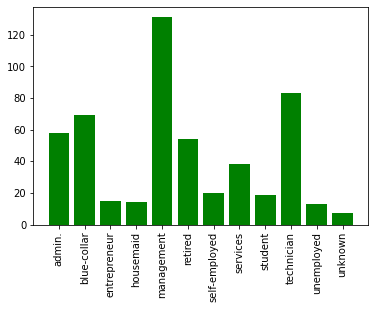

In [131]:
jobs = [job for job, df in df.groupby('job')]

plt.bar(jobs, job_df["target"], color = "green")
plt.xticks(jobs, rotation = 90)
plt.show()